# Top-down view of user and base station locations

Co-ordinates of the base stations are:
[[   0.            0.        ]
 [ 250.          433.01270189]
 [ 500.            0.        ]
 [ 250.         -433.01270189]
 [-250.         -433.01270189]
 [-500.            0.        ]
 [-250.          433.01270189]]
 
no. of users:  1681


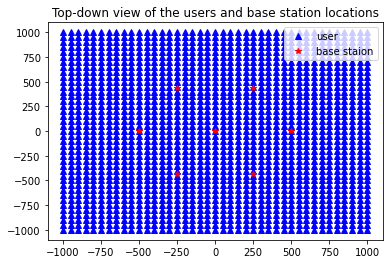

NOTE: Base Station Configuration: Base Station 0 in the Center, Base Station 1 at a 60-Degree Angle, and Others Following Clockwise Hexagonal Corners


In [1]:
from numpy import *
import math
import random
import numpy
from matplotlib import pyplot as plt

x1=0
y1=0
d=500

root3= math.sqrt(3)


x2= x1 + d*(1/2)
y2= y1 + d*(root3/2)
x3= x1 + d
y3= y1
x4= x1 + d*(1/2)
y4= y1 - d*(root3/2)
x5= x1 - d*(1/2)
y5= y1 - d*(root3/2)
x6= x1 - d
y6= y1
x7= x1 - d*(1/2)
y7= y1 + d*(root3/2)

print('Co-ordinates of the base stations are:')
arr= array([x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7 ,y7])
print(arr.reshape(7,2))

x= array([x1, x2, x3, x4, x5, x6, x7])
y= array([y1, y2, y3, y4, y5, y6, y7])

Uxy= [[x,y] for x in range(-1000,1001,50) for y in range(-1000,1001,50)]
Ux= [a[0] for a in Uxy]
Uy= [a[1] for a in Uxy]
numbPoints= len(Uxy)

print(' ')
print('no. of users: ',len(Uxy))

plt.plot(Ux,Uy,'b^')
plt.plot(x,y,'r*')
plt.title("Top-down view of the users and base station locations")
plt.legend(["user","base staion"])

#plt.figure(figsize=(5,3))
plt.show()

print("NOTE: Base Station Configuration: Base Station 0 in the Center, Base Station 1 at a 60-Degree Angle, and Others Following Clockwise Hexagonal Corners")

# Splitting the users into line of sight (los) and non-los (nlos) users

In [2]:
print("Total number of users: ",len(Uxy))

a =[]
for i in range(numbPoints):
    a.append(i)
    
random.shuffle(a)

b = a[:numbPoints//2]

c = a[numbPoints//2:]

Uxy_los = []
for i in b:
    Uxy_los.append(Uxy[i])
    
    
Uxy_nlos = []
for i in c:
    Uxy_nlos.append(Uxy[i])

print("Number of los users: ", len(Uxy_los))
print("Number of nlos users: ", len(Uxy_nlos))

Total number of users:  1681
Number of los users:  840
Number of nlos users:  841


# Finding pathloss for los users

In [3]:
def pathloss_los(num_users,x,y,Uxy): #x,y are arrays of x,y co-ordinates of bs; Uxy - 2D arrray of user co-ordinates
    Hbs= 25
    Hute_array = []
    for i in range(num_users):
        Hut=random.uniform(1.5, 22.5)
        Hute_array.append(Hut-1)

    He=1
    Hbse= Hbs-He

    fc= 10
    c= 3.0*(10**8)
    dbp_array = []
    for i in range(len(Hute_array)):
        dbp= 4*Hbse*Hute_array[i]*fc/c
        dbp_array.append(dbp)


    def dist(a,b,p,q):
        dist= ((a-p)**2 + (b-q)**2)**0.5
        return dist


    d2D = []
    for i in range(len(Uxy)):
        for j in range(7):
            a=dist(Uxy[i][0],Uxy[i][1],x[j],y[j])
            d2D.append(a)


    Hute_eq = []
    for x in Hute_array:
        for i in range(7):
            Hute_eq.append(x)

    dbp_eq = []
    for x in dbp_array:
        for i in range(7):
            dbp_eq.append(x)


    d3D = [((num**2 + (Hbse-Hute_eq[i])**2)**0.5) for i,num in enumerate(d2D)]


    pl = []
    for i in range(len(d2D)):
        if(d2D[i]>=10 and d2D[i]<=dbp_eq[i]):
            PLlos= 28.0+ 22*log10(d3D[i]) + 20*log10(fc)

        elif(d2D[i]>=dbp_eq[i] and d2D[i]<=5000):
            PLlos= 28.0+ 40*log10(d3D[i]) + 20*log10(fc) - 9*log10((dbp_eq[i]**2)+((Hbs-Hute_eq[i])**2))


        pl.append(PLlos)


    pl_7set = (numpy.array(pl)).reshape(int(len(pl)/7),7)
    return pl, pl_7set




# Finding pathloss for non los users

In [4]:
def pathloss_nlos(num_users,x,y,Uxy):#x,y are arrays of x,y co-ordinates of bs; Uxy - 2D arrray of user co-ordinates
    Hbs= 25
    Hute_array = []
    for i in range(num_users):
        Hut=random.uniform(1.5, 22.5)
        Hute_array.append(Hut-1)

    He=1
    Hbse= Hbs-He

    fc= 10
    c= 3.0*(10**8)
    dbp_array = []
    for i in range(len(Hute_array)):
        dbp= 4*Hbse*Hute_array[i]*fc/c
        dbp_array.append(dbp)


    def dist(a,b,p,q):
        dist= ((a-p)**2 + (b-q)**2)**0.5
        return dist


    d2D = []
    for i in range(len(Uxy)):
        for j in range(7):
            a=dist(Uxy[i][0],Uxy[i][1],x[j],y[j])
            d2D.append(a)


    Hute_eq = []
    for x in Hute_array:
        for i in range(7):
            Hute_eq.append(x)

    dbp_eq = []
    for x in dbp_array:
        for i in range(7):
            dbp_eq.append(x)


    d3D = [((num**2 + (Hbse-Hute_eq[i])**2)**0.5) for i,num in enumerate(d2D)]
    
    
    pl_nlos1 = []
    for i in range(len(d3D)):
        if(d2D[i]>=10 and d2D[i]<=dbp_eq[i]):
            pl1= 28.0+ 22*log10(d3D[i]) + 20*log10(fc)

        elif(d2D[i]>=dbp_eq[i] and d2D[i]<=5000):
            pl1= 28.0+ 40*log10(d3D[i]) + 20*log10(fc) - 9*log10((dbp_eq[i]**2)+((Hbs-Hute_eq[i])**2))

        pl_nlos1.append(pl1)

    pl_nlos2 = []
    for i in range(len(d3D)):
        pl2 = 13.54 + 39.08*log10(d3D[i]) + 20*log10(fc) - 0.6*(Hute_eq[i] - 1.5)
        pl_nlos2.append(pl2)


    pl_nlos= []
    for i in range(len(d3D)):
        a= max(pl_nlos1[i], pl_nlos2[i])
        pl_nlos.append(a)


    pl_nlos_7set = (numpy.array(pl_nlos)).reshape(int(len(pl_nlos)/7),7)
    
    return pl_nlos, pl_nlos_7set



# SINR for downlink

In [5]:
Pt= 10**1.6/3 #16dbm (3 directional antenna)

def sinr_downlink(pl,pl_7set):
    np= 10**(-17.0) #170dbm

    #ch_gain(db) = (-Pl + directivity_gain (0db) + BS_ant_gain (17db) - penetration_loss (0.8) - fading loss (0.5)- rf)
    #ch_gain(db) = (-Pl + 15.7)

    ht_linear = []
    for i in range(len(pl)):
        ht= -pl[i] + 15.7
        ht_linear.append(10**(ht/10))


    ht_7set = (numpy.array(ht_linear)).reshape(int(len(ht_linear)/7),7)


    sinr= []
    for i in range(len(pl_7set)):
        for j in range(7):
            sinrr= Pt*(ht_7set[i][j])/(np+Pt*(sum(ht_7set[i])-ht_7set[i][j])) #linear scale calculation
            sinr.append(sinrr) 

      
    sinr_7set = (numpy.array(sinr)).reshape(int(len(sinr)/7),7)
    
    sinr_plot = []
    for i in range(len(sinr_7set)):
        x = max(sinr_7set[i])
        sinr_plot.append(10*log10(x)) #sinr converted in db
    
    return sinr_7set, sinr_plot #sinr_7set(sinr in linear scale wrt all 7 bs); sinr_plot(max sinr in db)

# SINR for uplink

In [6]:
def sinr_uplink(pl, pl_7set):
    global Pt
    Pt= 10**1.8/3 #18dbm (3 directional antenna)
    sinr_7set, sinr_plot= sinr_downlink(pl,pl_7set)
    return sinr_7set, sinr_plot

In [7]:
pl_los, pl_los_7set = pathloss_los(numbPoints//2,x,y,Uxy_los)

pl_nlos, pl_nlos_7set = pathloss_nlos(numbPoints-(numbPoints//2),x,y,Uxy_nlos)

sinr_los_7set, sinr_los_plot= sinr_downlink(pl_los, pl_los_7set)
sinr_nlos_7set, sinr_nlos_plot= sinr_downlink(pl_nlos, pl_nlos_7set)


# Setting co-ordinates for the plot

In [8]:
sinr_comb_plot= sinr_los_plot + sinr_nlos_plot

Ux_los= [Uxy_los[i][0] for i in range(len(Uxy_los))]
Uy_los= [Uxy_los[i][1] for i in range(len(Uxy_los))]
Ux_nlos= [Uxy_nlos[i][0] for i in range(len(Uxy_nlos))]
Uy_nlos= [Uxy_nlos[i][1] for i in range(len(Uxy_nlos))]

Ux_plot= Ux_los + Ux_nlos
Uy_plot= Uy_los + Uy_nlos


# Downlink SINR Plot

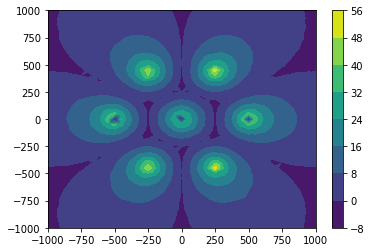

In [9]:
plt.tricontourf(Ux_plot,Uy_plot,sinr_comb_plot)
plt.colorbar()
plt.show()

# Uplink

In [10]:
sinrup_los_7set, sinrup_los_plot= sinr_uplink(pl_los, pl_los_7set)
sinrup_nlos_7set, sinrup_nlos_plot= sinr_uplink(pl_nlos, pl_nlos_7set)

sinrup_comb_plot= sinrup_los_plot + sinrup_nlos_plot


# Uplink SINR Plot

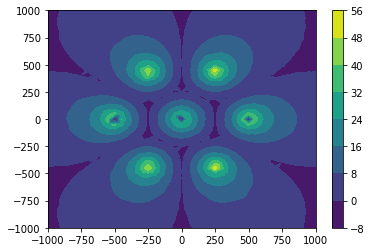

In [11]:
plt.tricontourf(Ux_plot,Uy_plot,sinrup_comb_plot)
plt.colorbar()
plt.show()

# Another type of Visualization

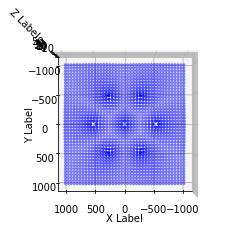

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Ux_plot,Uy_plot, sinr_comb_plot, c='b', marker='.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(90,90)

plt.show()

# Randomly selecting only 5% (approx.) of users for mobility

In [13]:
numbMobiles = int(0.05*numbPoints)

mobile_users = numpy.random.randint(0,numbPoints,numbMobiles) #mobile user indices

Uxm= [] #mobile user co-ordinates
Uym = []
Uxym= []
for i in range(numbMobiles):
    Uxm.append(Ux[mobile_users[i]])
    Uym.append(Uy[mobile_users[i]])
    Uxym.append(Uxy[mobile_users[i]])

print('The indices of mobile users selected are: \n', mobile_users, "\n")
print('Their respective x-coordinates are: \n', Uxm, "\n")
print('Their respective y-coordinates are: \n', Uym)

The indices of mobile users selected are: 
 [ 704 1532  284  635  840  324  524  255   33  981  794  490 1258  873
  413  179 1261 1450  837 1540  173  231 1572 1588 1398  985 1549 1396
 1267  670  543  236 1545  256 1073  993 1420  504 1413  977  628  138
  406 1381 1198 1470   57  971 1284  935 1353  477  603  213  913  317
  992 1258  315 1295  108 1487  916 1298 1528  525 1357 1277 1534 1621
  185  942 1231  179  760  504  419 1083  915  440  247  868  263 1665] 

Their respective x-coordinates are: 
 [-150, 850, -700, -250, 0, -650, -400, -700, -1000, 150, -50, -450, 500, 50, -500, -800, 500, 750, 0, 850, -800, -750, 900, 900, 700, 200, 850, 700, 500, -200, -350, -750, 850, -700, 300, 200, 700, -400, 700, 150, -250, -850, -550, 650, 450, 750, -950, 150, 550, 100, 650, -450, -300, -750, 100, -650, 200, 500, -650, 550, -900, 800, 100, 550, 850, -400, 650, 550, 850, 950, -800, 100, 500, -800, -100, -400, -500, 300, 100, -500, -700, 50, -700, 1000] 

Their respective y-coordinates are

# Random waypoint model

In [14]:
import numpy as np
def user_mobility(total_users, xi, yi, v_min, v_max):#xi,yi are initial positions of total users
    
    #boundary
    x_min = -1000
    x_max = 1000
    y_min = -1000
    y_max = 1000
    
    #position matrices
    x_pos = np.zeros((total_users))
    y_pos = np.zeros((total_users))
    
    #choose velocity uniformly between v_min and v_max (m/sec)
    velocity = np.random.randint(v_min, v_max, (total_users)) #velocity matrix for total users
    
    for i in range(total_users):
       # if (i==1):
        #    velocity[i]=v_fixed
        
        #directions of the mobile user
        theta = np.random.randint(0,360)
        
        x_pos[i] = xi[i] + velocity[i]*math.cos(math.radians(theta)) #s=vt taking t=1sec
        
        if x_pos[i] > x_max or x_pos[i] < x_min:
            theta = 180 - theta #cos reversal
            x_pos[i] = xi[i] + velocity[i]*math.cos(math.radians(theta))
            
        y_pos[i] = yi[i] + velocity[i]*math.sin(math.radians(theta))
        
        if y_pos[i] > y_max or y_pos[i] < y_min:
            theta = 180 + theta #sine reversal
            y_pos[i] = yi[i] + velocity[i]*math.sin(math.radians(theta))
            
    return x_pos, y_pos, velocity #matrices of length total_users

# Calculating SINR of mobile users

In [15]:
plm_los, plm_los_7set = pathloss_los(numbMobiles, x, y, Uxym)

sinrm_7set, sinrm_plot = sinr_downlink(plm_los, plm_los_7set)

In [16]:
sinrm_list= sinrm_7set.tolist()

def index_2d(myList, v):
    for i, x in enumerate(myList):
        if v in x:
            return x.index(v)

index_2d(sinrm_list,max(sinrm_list[5]))

6

# Tracking assigned base station over time intervals

In [17]:
def bs_assigned(numbMobiles,x,y,Uxm,Uym):
    Uxym = []
    for i in range(len(Uxm)):
        Uxym.append([Uxm[i],Uym[i]])
    
    
    plm_los, plm_los_7set = pathloss_los(numbMobiles, x, y, Uxym)

    sinrm_7set, sinrm_plot = sinr_downlink(plm_los, plm_los_7set)
    
    sinrm_linear= []
    for i in range(len(sinrm_plot)):
        sinrm_linear.append(10**(sinrm_plot[i]/10))

    sinrm_list= sinrm_7set.tolist()
    def index_2d(myList, v):
        for i, x in enumerate(myList):
            if v in x:
                return x.index(v)
    assigned_bs =[]
    for i in range(len(Uxym)):
        assigned_bs.append([i+1,index_2d(sinrm_list,max(sinrm_list[i]))])
        
    return assigned_bs, sinrm_linear
        #print("U-",i+1, "BS-", index_2d(sinrm_list,max(sinrm_list[5])),end=" ")

# Checking random waypoint model for a user

The base station assigned for the user under test is:
[user, base station assigned] =  [[1, 5]] 

Red dot is the starting point of the user


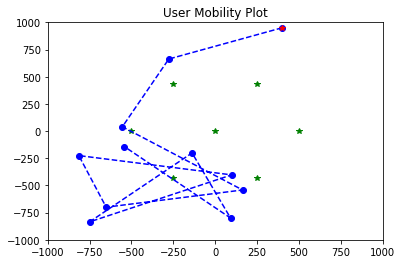

In [18]:
user = np.random.randint(0,numbPoints)

user_x = [Ux[user]]
user_y = [Uy[user]]

uxx=[user_x]
uyy=[user_y]
bsassigned_array = []
snr=[]
for i in range(10):
    user_x, user_y, vel  = user_mobility(1, user_x, user_y, 500, 1000)
    uxx.append(user_x)
    uyy.append(user_y)
    bsassigned_array, snr = bs_assigned(1,x,y,user_x, user_y)
print('The base station assigned for the user under test is:')
print('[user, base station assigned] = ', bsassigned_array,"\n")

plt.plot(x,y, 'g*')
plt.plot(uxx, uyy, 'bo', linestyle='--')
plt.plot(uxx[0], uyy[0], 'r*')
plt.title("User Mobility Plot")
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
print('Red dot is the starting point of the user')

# Tracking assigned base stations over time intervals for selected users

In [19]:
a = Uxm 
b = Uym

mobuser_bsassigned_array =[]
mobsarray=[]
mobile_snr =[]

mobsarray1, mobile_snr1 = bs_assigned(numbMobiles,x,y,a,b)
mobuser_bsassigned_array.append(mobsarray1)

print("given below are for 10 time instants- [user, base station assigned]\n")
for i in range(11): #10 time instants
    a,b,c = user_mobility(numbMobiles, a, b, 500, 1000) #a= x_pos, b= y_pos, c= velocity
    mobsarray, mobile_snr = bs_assigned(numbMobiles,x,y,a,b)
    mobuser_bsassigned_array.append(mobsarray)
    print(mobuser_bsassigned_array[i],"\n")



given below are for 10 time instants- [user, base station assigned]

[[1, 4], [2, 2], [3, 6], [4, 0], [5, 0], [6, 6], [7, 6], [8, 4], [9, 6], [10, 1], [11, 0], [12, 6], [13, 1], [14, 3], [15, 4], [16, 5], [17, 1], [18, 2], [19, 0], [20, 2], [21, 4], [22, 5], [23, 2], [24, 2], [25, 3], [26, 3], [27, 1], [28, 3], [29, 1], [30, 4], [31, 4], [32, 6], [33, 2], [34, 4], [35, 3], [36, 3], [37, 2], [38, 4], [39, 2], [40, 1], [41, 4], [42, 5], [43, 6], [44, 1], [45, 3], [46, 1], [47, 5], [48, 1], [49, 3], [50, 1], [51, 3], [52, 6], [53, 6], [54, 4], [55, 3], [56, 6], [57, 3], [58, 1], [59, 6], [60, 2], [61, 5], [62, 2], [63, 3], [64, 1], [65, 2], [66, 6], [67, 3], [68, 3], [69, 2], [70, 2], [71, 5], [72, 1], [73, 3], [74, 5], [75, 0], [76, 4], [77, 4], [78, 2], [79, 3], [80, 6], [81, 4], [82, 3], [83, 5], [84, 2]] 

[[1, 3], [2, 3], [3, 6], [4, 6], [5, 6], [6, 0], [7, 5], [8, 4], [9, 5], [10, 0], [11, 5], [12, 6], [13, 0], [14, 1], [15, 0], [16, 6], [17, 2], [18, 0], [19, 2], [20, 1], [21, 5], 

# Calculating num of handoffs

In [20]:
def num_of_HO(mobuser_bsassigned_array,num_time_instants):
    num_changes=[]
    for i in range(len(mobuser_bsassigned_array[0])):
        count=0
        for j in range(1,num_time_instants): #num_time_instants=10
            if(mobuser_bsassigned_array[j-1][i][1]!=mobuser_bsassigned_array[j][i][1]):
                count+=1
            
        num_changes.append(count)
    return num_changes

In [21]:
num_changes=[]
for i in range(len(mobuser_bsassigned_array[0])):
    count=0
    for j in range(1,10):
        if(mobuser_bsassigned_array[j-1][i][1]!=mobuser_bsassigned_array[j][i][1]):
            count+=1
            
    num_changes.append(count)

print("User - no.of BS changes")
for i in range(numbMobiles):
    print(i+1," - ", num_changes[i],"\t")

User - no.of BS changes
1  -  8 	
2  -  8 	
3  -  5 	
4  -  9 	
5  -  7 	
6  -  8 	
7  -  8 	
8  -  6 	
9  -  9 	
10  -  8 	
11  -  8 	
12  -  6 	
13  -  8 	
14  -  7 	
15  -  8 	
16  -  6 	
17  -  4 	
18  -  8 	
19  -  6 	
20  -  7 	
21  -  8 	
22  -  7 	
23  -  7 	
24  -  8 	
25  -  7 	
26  -  8 	
27  -  7 	
28  -  9 	
29  -  9 	
30  -  9 	
31  -  7 	
32  -  6 	
33  -  6 	
34  -  8 	
35  -  9 	
36  -  6 	
37  -  8 	
38  -  7 	
39  -  8 	
40  -  9 	
41  -  9 	
42  -  8 	
43  -  9 	
44  -  6 	
45  -  9 	
46  -  8 	
47  -  7 	
48  -  5 	
49  -  7 	
50  -  9 	
51  -  8 	
52  -  5 	
53  -  8 	
54  -  9 	
55  -  9 	
56  -  8 	
57  -  8 	
58  -  7 	
59  -  9 	
60  -  7 	
61  -  9 	
62  -  7 	
63  -  9 	
64  -  5 	
65  -  8 	
66  -  9 	
67  -  5 	
68  -  9 	
69  -  8 	
70  -  9 	
71  -  9 	
72  -  7 	
73  -  4 	
74  -  9 	
75  -  7 	
76  -  8 	
77  -  8 	
78  -  9 	
79  -  8 	
80  -  9 	
81  -  8 	
82  -  9 	
83  -  7 	
84  -  6 	


# Checking random waypoint model for 3 users

Consider only 2nd coordinate to check for BS
User cyan -  [[[1, 2]], [[1, 4]], [[1, 6]], [[1, 6]], [[1, 5]], [[1, 1]], [[1, 0]], [[1, 1]], [[1, 3]], [[1, 3]]] 

User red -  [[[1, 3]], [[1, 0]], [[1, 3]], [[1, 4]], [[1, 3]], [[1, 3]], [[1, 6]], [[1, 4]], [[1, 2]], [[1, 6]]] 

User yellow -  [[[1, 3]], [[1, 3]], [[1, 3]], [[1, 3]], [[1, 3]], [[1, 0]], [[1, 2]], [[1, 0]], [[1, 5]], [[1, 3]]] 



BSs are denoted by black stars

zeroth instant is denoted by blue stars


(-1000.0, 1000.0)

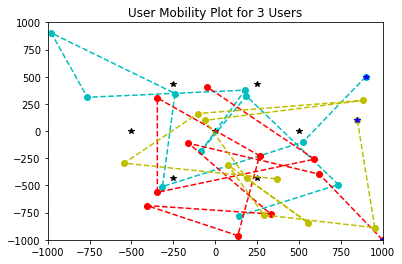

In [22]:
user=[]
for i in range(3):
    user.append(np.random.randint(0,numbPoints))

user_x0 = [Ux[user[0]]]
user_y0 = [Uy[user[0]]]

bsassigned_array0= []
uxx0=[user_x0]
uyy0=[user_y0]
for i in range(10):
    user_x0, user_y0, vel  = user_mobility(1, user_x0, user_y0, 500, 1000)
    uxx0.append(user_x0)
    uyy0.append(user_y0)
    bsassigned_array0.append(bs_assigned(1,x,y,user_x0, user_y0)[0])
print("Consider only 2nd coordinate to check for BS")
print("User cyan - ", bsassigned_array0,"\n")
    
    
    
user_x1 = [Ux[user[1]]]
user_y1 = [Uy[user[1]]]

bsassigned_array1= []
uxx1=[user_x1]
uyy1=[user_y1]
for i in range(10):
    user_x1, user_y1, vel  = user_mobility(1, user_x1, user_y1, 500, 1000)
    uxx1.append(user_x1)
    uyy1.append(user_y1)
    bsassigned_array1.append(bs_assigned(1,x,y,user_x1, user_y1)[0])
print("User red - ", bsassigned_array1,"\n")
    
user_x2 = [Ux[user[2]]]
user_y2 = [Uy[user[2]]]

bsassigned_array2= []
uxx2=[user_x2]
uyy2=[user_y2]
for i in range(10):
    user_x2, user_y2, vel  = user_mobility(1, user_x2, user_y2, 500, 1000)
    uxx2.append(user_x2)
    uyy2.append(user_y2)
    bsassigned_array2.append(bs_assigned(1,x,y,user_x2, user_y2)[0])
print("User yellow - ", bsassigned_array2,"\n\n\n")

print("BSs are denoted by black stars\n")
print("zeroth instant is denoted by blue stars")
plt.plot(x,y,'k*')
    
plt.plot(uxx0, uyy0, 'co', linestyle='--')
plt.plot(uxx1, uyy1, 'ro', linestyle='--')
plt.plot(uxx2, uyy2, 'yo', linestyle='--')

plt.plot(uxx0[0], uyy0[0], 'b*')
plt.plot(uxx1[0], uyy1[0], 'b*')
plt.plot(uxx2[0], uyy2[0], 'b*')

plt.title("User Mobility Plot for 3 Users")

plt.xlim([-1000,1000])
plt.ylim([-1000,1000])





# Analyzing handover frequency with speed variation

In [23]:
def speed_vs_numBSchanges(vmax,time_instant):
    user = np.random.randint(0,numbPoints)
    uux = [Ux[user]]
    uuy = [Uy[user]]
    
    
    num_changes = []

    for k in range(80):
        mobuser_bsassigned =[]
        for i in range(time_instant): #time instants
            uux,uuy,vv = user_mobility(1, uux, uuy, 0, vmax) #uux= x_pos, uuy= y_pos, vv= velocity
            mobuser_bsassigned.append(bs_assigned(1,x,y,uux,uuy)[0])
    
    

        count=0
        for j in range(1,time_instant):
            if(mobuser_bsassigned[j-1][0][1]!=mobuser_bsassigned[j][0][1]):
                count+=1
            
        num_changes.append(count)
        avg = sum(num_changes)/len(num_changes)
        
    return num_changes, avg


# For user1 with vmin=0 and vmax=30km/h (scaled to 400)

In [24]:
avg1 = []

for i in range(10,70,10):
    l, m = speed_vs_numBSchanges(400,i)
    avg1.append(m)
    
time = [10,20,30,40,50,60]


# For user2 with vmin=0 and vmax=60km/h (scaled to 800)

In [25]:
avg2 = []

for i in range(10,70,10):
    l, m = speed_vs_numBSchanges(800,i)
    avg2.append(m)

# For user3 with vmin=0 and vmax=90km/h (scaled to 1200)

In [26]:
avg3 = []

for i in range(10,70,10):
    l, m = speed_vs_numBSchanges(1200,i)
    avg3.append(m)

# Plotting handover frequency vs speed variation

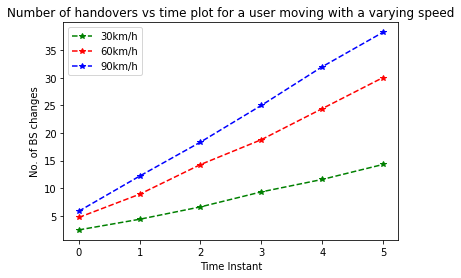

In [27]:
time = np.arange(6)
plt.plot(time,avg1,'g*', linestyle='--')
plt.plot(time,avg2,'r*', linestyle='--')
plt.plot(time,avg3,'b*', linestyle='--')

plt.title("Number of handovers vs time plot for a user moving with a varying speed")
plt.xlabel("Time Instant")
plt.ylabel("No. of BS changes")
plt.legend(["30km/h","60km/h","90km/h"])

# Analyzing handover frequency with constant speed variation

In [28]:
def constspeed_vs_numBSchanges(vmax,time_instant):
    user = np.random.randint(0,numbPoints)
    uux = [Ux[user]]
    uuy = [Uy[user]]
    
    
    num_changes = []

    for k in range(80):
        mobuser_bsassigned =[]
        for i in range(time_instant): #time instants
            uux,uuy,vv = user_mobility(1, uux, uuy, vmax, vmax+1) #uux= x_pos, uuy= y_pos, vv= velocity
            mobuser_bsassigned.append(bs_assigned(1,x,y,uux,uuy)[0])
    
    

        count=0
        for j in range(1,time_instant):
            if(mobuser_bsassigned[j-1][0][1]!=mobuser_bsassigned[j][0][1]):
                count+=1
            
        num_changes.append(count)
        avg = sum(num_changes)/len(num_changes)
        
    return num_changes, avg


# For user1 with vmin=0 and vmax=30km/h (scaled to 400)

In [29]:
avg11 = []

for i in range(10,70,10):
    l, m = constspeed_vs_numBSchanges(400,i)
    avg11.append(m)
    
time = [10,20,30,40,50,60]


# For user2 with vmin=0 and vmax=60km/h (scaled to 800)

In [30]:
avg22 = []

for i in range(10,70,10):
    l, m = constspeed_vs_numBSchanges(800,i)
    avg22.append(m)

# For user3 with vmin=0 and vmax=90km/h (scaled to 1200)

In [31]:
avg33 = []

for i in range(10,70,10):
    l, m = constspeed_vs_numBSchanges(1200,i)
    avg33.append(m)

# Plotting handover frequency with constant speed variation

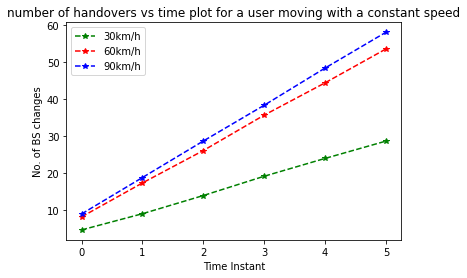

In [32]:
time = np.arange(6)
plt.plot(time,avg11,'g*', linestyle='--')
plt.plot(time,avg22,'r*', linestyle='--')
plt.plot(time,avg33,'b*', linestyle='--')

plt.title("number of handovers vs time plot for a user moving with a constant speed")
plt.xlabel("Time Instant")
plt.ylabel("No. of BS changes")
plt.legend(["30km/h","60km/h","90km/h"])

# Tracking base station assignments for a moving single user over time

[[1, 6], [[1, 6]], [[1, 6]], [[1, 1]], [[1, 1]], [[1, 1]], [[1, 2]], [[1, 2]], [[1, 0]], [[1, 5]], [[1, 0]]] 



(-1000.0, 1000.0)

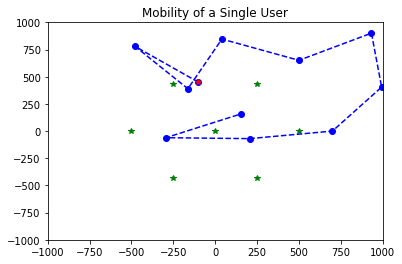

In [33]:
user = np.random.randint(0,numbPoints)

user_x = [Ux[user]]
user_y = [Uy[user]]



uxx=[user_x]
uyy=[user_y]
bsassigned_array,sinr_values = bs_assigned(1,x,y,user_x, user_y)
mobuser_bsassigned_array =[bs_assigned(1,x,y,user_x,user_y)[0]]


for i in range(10):
    user_x, user_y, vel  = user_mobility(1, user_x, user_y, 500, 501)
    uxx.append(user_x)
    uyy.append(user_y)
    bsassigned_array1,sinr_values1 = bs_assigned(1,x,y,user_x, user_y)
    bsassigned_array.append(bsassigned_array1)
    sinr_values.append(sinr_values1)
    mobuser_bsassigned_array.append(bsassigned_array1)
print(bsassigned_array,"\n")


plt.plot(x,y, 'g*')
plt.plot(uxx, uyy, 'bo', linestyle='--')
plt.plot(uxx[0], uyy[0], 'r*')
plt.title("Mobility of a Single User")
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])

# The Plot

[[1, 6], [[1, 6]], [[1, 6]], [[1, 1]], [[1, 1]], [[1, 1]], [[1, 2]], [[1, 2]], [[1, 0]], [[1, 5]], [[1, 0]]]


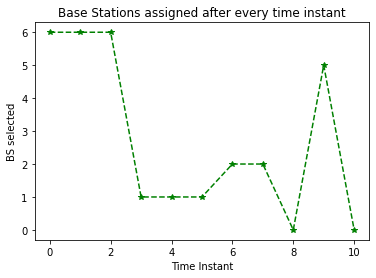

In [34]:
bs_selected=[bsassigned_array[0][1]]

for j in range(1,len(bsassigned_array)):
    bs_selected.append(bsassigned_array[j][0][1])
    
time = np.arange(11)
plt.plot(time,bs_selected,'g*', linestyle='--')

plt.title("Base Stations assigned after every time instant")
plt.xlabel("Time Instant")
plt.ylabel("BS selected")

print(bsassigned_array)

# Number of handovers occured

In [54]:
handovers = num_of_HO(mobuser_bsassigned_array,11)
print("no. of handovers = ",handovers)

no. of handovers =  [4]


# Calculating the rate

In [55]:
rate =[]
rate.append(log2(1+sinr_values[0]))
for i in range(1,len(sinr_values)):
    rate.append(log2(1+sinr_values[i][0]))
    
print(rate)


[1.4791479861920855, 2.1767947040897506, 1.5423708985549403, 1.713277890307531, 6.708187467677623, 1.6150632028959724, 1.3161837799561167, 1.8583251112113037, 2.4128170662391866, 0.8367240449568601, 3.983264811498867]


# Handover Scenario Plot of a Single Moving User

[[1, 4], [[1, 4]], [[1, 4]], [[1, 4]], [[1, 4]], [[1, 5]], [[1, 4]], [[1, 4]], [[1, 3]], [[1, 3]], [[1, 5]]]


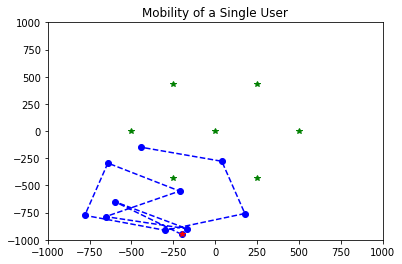

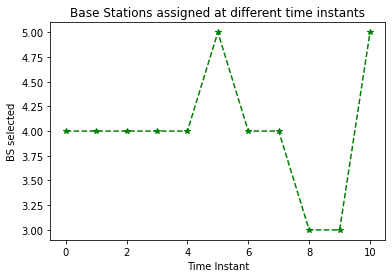

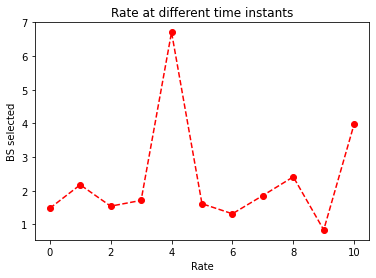

In [59]:
plt.plot(x,y, 'g*')
plt.plot(uxx, uyy, 'bo', linestyle='--')
plt.plot(uxx[0], uyy[0], 'r*')
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.title("Mobility of a Single User")
plt.figure()

bs_selected=[bsassigned_array[0][1]]

for j in range(1,len(bsassigned_array)):
    bs_selected.append(bsassigned_array[j][0][1])
    
time = np.arange(11)

plt.title("User mobility plot")
plt.plot(time,bs_selected,'g*', linestyle='--')

plt.title("Base Stations assigned at different time instants")
plt.xlabel("Time Instant")
plt.ylabel("BS selected")

print(bsassigned_array)

plt.figure()

plt.title("Rate at different time instants")
plt.xlabel("Rate")
plt.ylabel("BS selected")
plt.plot(time,rate,'ro',linestyle='--')
